# Interactive labeling with Jupyter

In this example, the active learning workflow of modAL is demonstrated - with you in the loop! By running this notebook, you'll be queried to label digits using the [DIGITS dataset](http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits)

In [1]:
!pip install modal

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np

from modAL.models import ActiveLearner
from modAL.uncertainty import uncertainty_sampling

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from IPython import display
from matplotlib import pyplot as plt

## The dataset

Now we set up the initial training set for our classifier. If you would like to play around, you can try to modifiy the value ```n_initial``` below and see if it impacts the algorithm!

In [67]:
n_initial = 1000

In [68]:
#X, y = load_digits(return_X_y=True)

from sklearn.datasets import fetch_openml
#mnist = fetch_openml('mnist_784')

X, y = fetch_openml(name='mnist_784', as_frame=False, return_X_y=True, parser="pandas")

In [69]:
y = y.astype(int)

In [70]:
y

array([5, 0, 4, ..., 4, 5, 6])

In [71]:
X.shape, y.shape

((70000, 784), (70000,))

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

initial_idx = np.random.choice(range(len(X_train)), size=n_initial, replace=False)

X_initial, y_initial = X_train[initial_idx], y_train[initial_idx]
X_pool, y_pool = np.delete(X_train, initial_idx, axis=0), np.delete(y_train, initial_idx, axis=0)

In [73]:
X_train.shape

(52500, 784)

In [74]:
X_train.dtype

dtype('int64')

In [75]:
y_initial

array([5, 2, 3, 4, 7, 9, 1, 6, 0, 7, 2, 7, 1, 9, 1, 4, 5, 3, 2, 9, 3, 0,
       1, 9, 7, 6, 9, 2, 6, 9, 8, 8, 7, 6, 0, 9, 5, 1, 4, 3, 2, 3, 9, 7,
       3, 1, 3, 9, 6, 5, 6, 3, 7, 7, 7, 9, 6, 7, 3, 8, 4, 4, 9, 9, 6, 4,
       0, 0, 6, 5, 4, 2, 5, 7, 9, 4, 5, 4, 3, 7, 7, 0, 0, 2, 2, 5, 3, 7,
       0, 8, 5, 1, 2, 5, 6, 5, 2, 1, 1, 0, 9, 6, 0, 3, 0, 7, 7, 3, 9, 7,
       5, 7, 2, 4, 1, 2, 0, 7, 1, 5, 0, 8, 1, 9, 3, 4, 9, 8, 2, 0, 8, 1,
       9, 9, 9, 4, 2, 8, 5, 1, 2, 3, 8, 6, 0, 4, 4, 3, 6, 1, 8, 6, 7, 7,
       5, 7, 5, 4, 3, 7, 8, 2, 6, 1, 3, 8, 1, 9, 7, 8, 3, 9, 0, 2, 3, 5,
       6, 9, 9, 2, 8, 3, 0, 1, 7, 2, 8, 6, 1, 5, 5, 9, 6, 6, 0, 6, 8, 9,
       1, 8, 4, 7, 3, 1, 5, 9, 6, 1, 9, 0, 7, 1, 1, 7, 4, 3, 2, 1, 5, 0,
       5, 6, 1, 6, 5, 3, 8, 8, 0, 0, 7, 2, 3, 5, 8, 6, 0, 6, 9, 9, 6, 7,
       7, 6, 4, 5, 7, 7, 8, 2, 4, 8, 1, 5, 9, 4, 8, 8, 9, 1, 6, 4, 0, 7,
       6, 2, 3, 9, 9, 3, 2, 6, 7, 1, 2, 5, 6, 7, 8, 8, 9, 7, 4, 8, 7, 1,
       0, 7, 6, 8, 5, 3, 2, 9, 1, 8, 9, 6, 6, 1, 9,

## Initializing the learner

Now we initialize the active learner. Feel free to change the underlying ```RandomForestClassifier``` or the ```uncertainty_sampling```!

In [76]:
learner = ActiveLearner(
    estimator=RandomForestClassifier(),
    query_strategy=uncertainty_sampling,
    X_training=X_initial, y_training=y_initial
)

In [77]:
X_initial.shape

(1000, 784)

In [78]:
y_initial.shape

(1000,)

We also set how many queries we want to make. The more the better! (Usually :) )

In [79]:
n_queries = 20

## The active learning loop

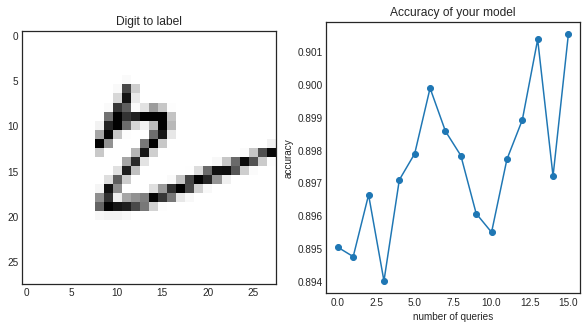

Which digit is this?


KeyboardInterrupt: ignored

In [80]:
accuracy_scores = [learner.score(X_test, y_test)]

for i in range(n_queries):
    display.clear_output(wait=True)
    query_idx, query_inst = learner.query(X_pool)
    with plt.style.context('seaborn-white'):
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.title('Digit to label')
        plt.imshow(query_inst.reshape(28, 28))
        plt.subplot(1, 2, 2)
        plt.title('Accuracy of your model')
        plt.plot(range(i+1), accuracy_scores)
        plt.scatter(range(i+1), accuracy_scores)
        plt.xlabel('number of queries')
        plt.ylabel('accuracy')
        display.display(plt.gcf())
        plt.close('all')
        
    print("Which digit is this?")
    y_new = np.array([int(input())], dtype=int)
    learner.teach(query_inst.reshape(1, -1), y_new)
    X_pool, y_pool = np.delete(X_pool, query_idx, axis=0), np.delete(y_pool, query_idx, axis=0)
    accuracy_scores.append(learner.score(X_test, y_test))

Finally, we can visualize the accuracy during the training.

ValueError: ignored

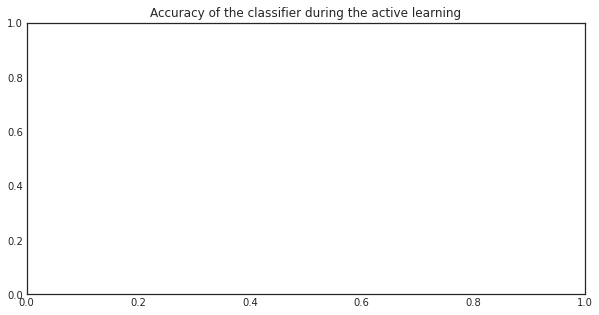

In [81]:
with plt.style.context('seaborn-white'):
    plt.figure(figsize=(10, 5))
    plt.title('Accuracy of the classifier during the active learning')
    plt.plot(range(n_queries+1), accuracy_scores)
    plt.scatter(range(n_queries+1), accuracy_scores)
    plt.xlabel('number of queries')
    plt.ylabel('accuracy')
    plt.show()